# Deep Learning Enabeld Protein Structure Exploration

Summer VFP Project 2017

----- 

## Introduction
-----

### Protein Folding and Machine Learning

- Current approaches: SVMs, random forests, bespoke discriminators, etc.
- Motivation for project is to explore an innovative path and leverage the strengths of deep learning to the domain.

### A Deep Learning Approach

- Convolutional Neural Networks (CNNs) were originally designed for performing feature extraction from 2D images.
- How to leverage the power of CNNs to the task of protein scoring and structure prediction, an inherently 3D domain?
- Get the 3D spatial data into 2D and a convolutional network can learn and possibly even extract features from the data. 

## Protein Structural Encoding
-----

### Space Filling Curves

- Space-filling curves map multidimensional data to one dimension while preserving relative locality of data points.

### Z-Order Curves

- Z-Order Curves...

##### 2D Curve Example:

/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


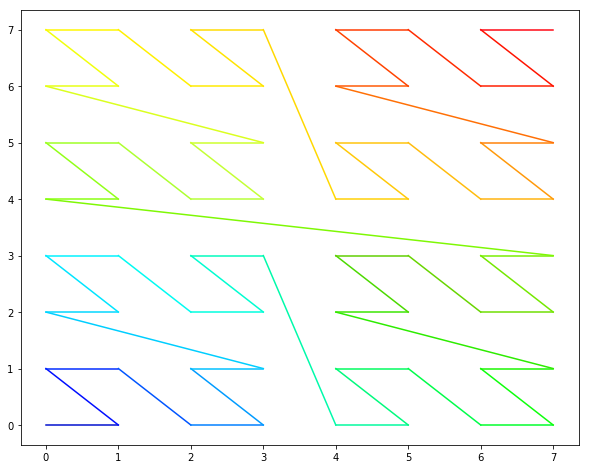

In [1]:
import numpy as np
from pylab import *
rcParams['figure.figsize'] = (10.0, 8.0)

def z_curve_2d(order):
    '''
    '''
    z_curve = []
    for i in range(pow(pow(2, order),2)):
        x = i
        x&= 0x55555555
        x = (x ^ (x >> 1)) & 0x33333333
        x = (x ^ (x >> 2)) & 0x0f0f0f0f
        x = (x ^ (x >> 4)) & 0x00ff00ff
        x = (x ^ (x >> 8)) & 0x0000ffff

        y = i >> 1
        y&= 0x55555555
        y = (y ^ (y >> 1)) & 0x33333333
        y = (y ^ (y >> 2)) & 0x0f0f0f0f
        y = (y ^ (y >> 4)) & 0x00ff00ff
        y = (y ^ (y >> 8)) & 0x0000ffff
        
        z_curve.append([x, y])
    
    return np.array(z_curve)

curve = z_curve_2d(3) # Change to see different order Z-curves

# Display Curve
colormap = cm.gist_ncar
gca().set_color_cycle([colormap(i) for i in np.linspace(0.1, 0.75, len(curve))])
for i in range(len(curve)):
    plot(curve[i:i+2,0], curve[i:i+2,1])
show()

##### 3D Curve Example:

In [2]:
from mayavi import mlab
mlab.init_notebook(width=600, height=400)

def z_curve_3d(order):
    '''
    '''
    z_curve = []
    for i in range(pow(pow(2, order),3)):
        x = i
        x &= 0x09249249
        x = (x ^ (x >>  2)) & 0x030c30c3
        x = (x ^ (x >>  4)) & 0x0300f00f
        x = (x ^ (x >>  8)) & 0xff0000ff
        x = (x ^ (x >> 16)) & 0x000003ff

        y = i >> 1
        y &= 0x09249249
        y = (y ^ (y >>  2)) & 0x030c30c3
        y = (y ^ (y >>  4)) & 0x0300f00f
        y = (y ^ (y >>  8)) & 0xff0000ff
        y = (y ^ (y >> 16)) & 0x000003ff
        
        z = i >> 2
        z &= 0x09249249
        z = (z ^ (z >>  2)) & 0x030c30c3
        z = (z ^ (z >>  4)) & 0x0300f00f
        z = (z ^ (z >>  8)) & 0xff0000ff
        z = (z ^ (z >> 16)) & 0x000003ff
        
        z_curve.append([x, y, z])
    
    return np.array(z_curve)

curve = z_curve_3d(3) # Change to see different order Z-curves

mlab.clf()
curve *= 100 # Scaling in 3D Plot
plt = mlab.plot3d(curve[:,0], curve[:,1], curve[:,2], np.arange(len(curve)), tube_radius=2); plt

Notebook initialized with x3d backend.


### Hilbert Curves

- Hilbert curves ...

##### 2D Curve Example:

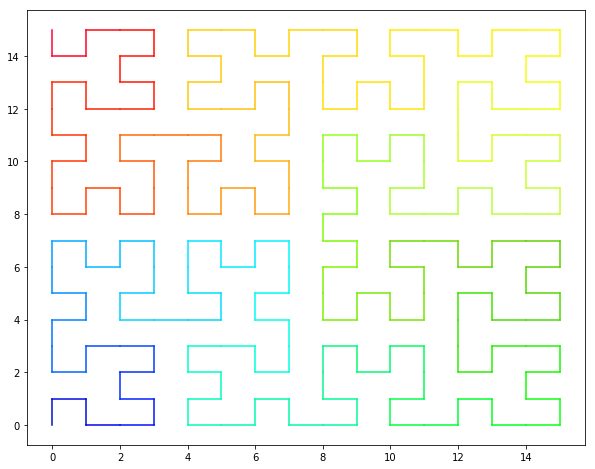

In [3]:
def hilbert_curve_2d(order):
    '''
    '''
    def gen_2d(order, x, y, xi, xj, yi, yj, array):
        if order == 0:
            xx = x + (xi + yi)/2
            yy = y + (xj + yj)/2
            array.append((xx, yy))
        else:
            gen_2d(order-1, x, y, yi/2, yj/2, xi/2, xj/2, array)
            gen_2d(order-1, x + xi/2, y + xj/2, xi/2, xj/2, yi/2, yj/2, array)
            gen_2d(order-1, x + xi/2 + yi/2, y + xj/2 + yj/2, xi/2, xj/2, yi/2, yj/2, array)
            gen_2d(order-1, x + xi/2 + yi, y + xj/2 + yj, -yi/2,-yj/2,-xi/2,-xj/2, array)
    
    n = pow(2, order)
    hilbert_curve = []
    gen_2d(order, 0, 0, n, 0, 0, n, hilbert_curve)
    
    return np.array(hilbert_curve)

curve = hilbert_curve_2d(4) # Change to see different order hilbert-curves

# Display Curve
colormap = cm.gist_ncar
gca().set_color_cycle([colormap(i) for i in np.linspace(0.1, 0.75, len(curve))])
for i in range(len(curve)):
    plot(curve[i:i+2,0], curve[i:i+2,1])
show()

##### 3D Curve Example:

In [14]:
def hilbert_curve_3d(order):
    '''
    '''
    def gen_3d(order, x, y, z, xi, xj, xk, yi, yj, yk, zi, zj, zk, array):
        if order == 0:
            xx = x + (xi + yi + zi)/3
            yy = y + (xj + yj + zj)/3
            zz = z + (xk + yk + zk)/3
            array.append((xx, yy, zz))
        else:
            gen_3d(order-1, x, y, z, yi/2, yj/2, yk/2, zi/2, zj/2, zk/2, xi/2, xj/2, xk/2, array)

            gen_3d(order-1, x + xi/2, y + xj/2, z + xk/2,  zi/2, zj/2, zk/2, xi/2, xj/2, xk/2,
            yi/2, yj/2, yk/2, array)
            gen_3d(order-1, x + xi/2 + yi/2, y + xj/2 + yj/2, z + xk/2 + yk/2, zi/2, zj/2, zk/2,
            xi/2, xj/2, xk/2, yi/2, yj/2, yk/2, array)
            gen_3d(order-1, x + xi/2 + yi, y + xj/2+ yj, z + xk/2 + yk, -xi/2, -xj/2, -xk/2, -yi/2,
            -yj/2, -yk/2, zi/2, zj/2, zk/2, array)
            gen_3d(order-1, x + xi/2 + yi + zi/2, y + xj/2 + yj + zj/2, z + xk/2 + yk +zk/2, -xi/2,
            -xj/2, -xk/2, -yi/2, -yj/2, -yk/2, zi/2, zj/2, zk/2, array)
            gen_3d(order-1, x + xi/2 + yi + zi, y + xj/2 + yj + zj, z + xk/2 + yk + zk, -zi/2, -zj/2,
            -zk/2, xi/2, xj/2, xk/2, -yi/2, -yj/2, -yk/2, array)
            gen_3d(order-1, x + xi/2 + yi/2 + zi, y + xj/2 + yj/2 + zj , z + xk/2 + yk/2 + zk, -zi/2,
            -zj/2, -zk/2, xi/2, xj/2, xk/2, -yi/2, -yj/2, -yk/2, array)
            gen_3d(order-1, x + xi/2 + zi, y + xj/2 + zj, z + xk/2 + zk, yi/2, yj/2, yk/2, -zi/2, -zj/2,
            -zk/2, -xi/2, -xj/2, -xk/2, array)

    n = pow(2, order)
    hilbert_curve = []
    gen_3d(order, 0, 0, 0, n, 0, 0, 0, n, 0, 0, 0, n, hilbert_curve)

    return np.array(hilbert_curve)

curve = hilbert_curve_3d(3) # Change to see different order Z-curves

mlab.clf()
curve *= 100 # Scaling in 3D Plot
v = mlab.figure(bgcolor=(1.0,1.0,1.0))
plt = mlab.plot3d(curve[:,0], curve[:,1], curve[:,2], np.arange(len(curve)), tube_radius=2, figure=v); plt

### Encoding 3D to 2D Using Space Filling Curves

- Encoding 3D data into 2D will provide...

#### Selecting Curve Orders

- Selecting curve order such that the 3D space is mapped onto the 2D space in a one to one manner.

In [ ]:
def mappable_curve_orders():
    '''
    '''
    print "3D Order\t2D Order\tNumber of Elements"
    for i in range(64):
        x = pow(2,i)
        sq = np.sqrt(x)
        cb = np.cbrt(x)
        if sq %1.0 == 0.0 and cb %1.0 == 0.0:
            print int(np.log2(cb)), '\t\t', int(np.log2(sq)), '\t\t', x
    
    
mappable_curve_orders()

#### 3D Space Encoding Example:

In [ ]:
def encode_3d_to_2d(array_3d, curve_3d, curve_2d):
    '''
    '''
    # Dimension Reduction Using Space Filling Curves to 2D
    s = int(np.sqrt(len(curve_2d)))
    array_2d = np.zeros([s,s])
    for i in range(len(curve_3d)):
        c2d = curve_2d[i]
        c3d = curve_3d[i]
        array_2d[c2d[0], c2d[1]] = array_3d[c3d[0], c3d[1], c3d[2]]
    return array_2d

# Generate Curves - change to other curves and mappable orders to see different encodings
curve_3d = hilbert_curve_3d(4)
curve_2d = hilbert_curve_2d(6)

# Generate 3D Space
array_3d = np.arange(len(curve_3d))
s = int(np.cbrt(len(curve_3d)))
array_3d = array_3d.reshape((s,s,s))

# Encode 3D Space
array_2d = encode_3d_to_2d(array_3d, curve_3d, curve_2d)

# Display 3D Space
mlab.clf()
x, y, z = np.where(array_3d >= 0)
plt = mlab.points3d(x, y, z, np.arange(len(curve_3d)), scale_mode='none', mode='cube'); plt


In [ ]:
# Display Encoded 3D Space
matshow(array_2d, cmap=cm.jet, interpolation='nearest')
show()

#### Comparing Relative Distance Between Points in 3D Space Versus 2D Encoding

- Maintaining relative distance and nearest neighbor ranking between 3D space and 2D encoding...

In [ ]:
from numpy.matlib import repmat, repeat

def calc_distance_matrix(curve):
    '''
    '''
    curve_size = len(curve)
    distMat = sqrt(np.sum((repmat(curve, curve_size, 1) - repeat(curve, curve_size, axis=0))**2, axis=1))
    return distMat.reshape((curve_size, curve_size))

# Generate Curves - change to other curves and mappable orders to see different distance matrix
curve_3d = hilbert_curve_3d(4)
curve_2d = hilbert_curve_2d(6)

# Calculate Distance Between Points in Curves
dist_mat_3d = calc_distance_matrix(curve_3d)
dist_mat_2d = calc_distance_matrix(curve_2d)

# Display 3D Curve Distance Matrix
matshow(dist_mat_3d, cmap=cm.plasma, interpolation='nearest')
colorbar()
show()

In [ ]:
# Display 2D Curve Distance Matrix
matshow(dist_mat_2d, cmap=cm.plasma, interpolation='nearest')
colorbar()
show()

### Protein Data Bank Files (PDBs)

- Protein structure data is provided in PDB format...
- Data includes...

#### Parsing PDB File

In [ ]:
from prody import *

van_der_waal_radii = {  'H' : 1.2, 'C' : 1.7, 'N' : 1.55, 'O' : 1.52, 'S' : 1.8,
                        'D' : 1.2, 'F' : 1.47, 'CL' : 1.75, 'BR' : 1.85, 'P' : 1.8,
                        'I' : 1.98, '' : 0} # Source:https://physlab.lums.edu.pk/images/f/f6/Franck_ref2.pdf

def get_pdb_data(pdb_id, channels):
    '''
    '''
    # Parse PDB File
    molecule = parsePDB(fetchPDB(pdb_id, copy=False)).select('protein')

    # Set Protein's Center Of Mass At Origin
    moveAtoms(molecule, to=np.zeros(3))

    # Gather Atom Information
    pdb_data = []
    for channel in channels:
        molecule_channel = molecule.select(channel)
        if molecule_channel is not None:
            channel_radii = [van_der_waal_radii[k] for k in molecule_channel.getElements()]
            channel_radii = np.expand_dims(channel_radii, 1)
            channel_coords = molecule_channel.getCoords()
            channel_data = np.concatenate([channel_radii, channel_coords], 1)
        else: channel_data = np.empty((1,4))
        pdb_data.append(channel_data)
    pdb_data = np.array(pdb_data)

    return pdb_data

# Gather PDB Data For Desired Channels
channels = ['hydrophobic', 'polar', 'charged']
pdb_data = get_pdb_data('1aa9', channels)
pdb_data   

#### Skeletal Model 

In [ ]:
from matplotlib.cm import jet

def display_skeletal_model(pdb_data):
    '''
    '''
    # Color Mapping
    n = len(pdb_data)
    cm = [jet(float(i)/n)[:3] for i in range(n)]
    
    for i in range(n):
        
        # Coordinate Information
        x = pdb_data[i][:,3].astype('float')
        y = pdb_data[i][:,2].astype('float')
        z = pdb_data[i][:,1].astype('float')
        
        # Display 3D Skeletal Rendering
        c = cm[i]
        plt = mlab.points3d(x, y, z, mode="sphere", color=c, scale_factor=0.5)
        
    return plt
    
mlab.clf()
display_skeletal_model(pdb_data)

#### Space Filling Atomic Model

In [ ]:
import vtk
from tvtk.api import tvtk
from tvtk.common import configure_input_data

def display_3d_mesh(pdb_data):
    '''
    '''
    # Color Mapping
    n = len(pdb_data)
    cm = [jet(float(i)/n)[:3] for i in range(n)]
    
    v = mlab.figure()
    for j in range(len(pdb_data)):

        # Coordinate, Radius Information
        r = pdb_data[j][:,0].astype('float')
        x = pdb_data[j][:,1].astype('float')
        y = pdb_data[j][:,2].astype('float')
        z = pdb_data[j][:,3].astype('float')

        # Generate Mesh For Protein
        append_filter = vtk.vtkAppendPolyData()
        for i in range(len(pdb_data[j])):
            input1 = vtk.vtkPolyData()
            sphere_source = vtk.vtkSphereSource()
            sphere_source.SetCenter(x[i],y[i],z[i])
            sphere_source.SetRadius(r[i])
            sphere_source.Update()
            input1.ShallowCopy(sphere_source.GetOutput())
            append_filter.AddInputData(input1)
        append_filter.Update()

        #  Remove Any Duplicate Points.
        clean_filter = vtk.vtkCleanPolyData()
        clean_filter.SetInputConnection(append_filter.GetOutputPort())
        clean_filter.Update()

        # Render Mesh
        pd = tvtk.to_tvtk(clean_filter.GetOutput())
        sphere_mapper = tvtk.PolyDataMapper()
        configure_input_data(sphere_mapper, pd)
        c = cm[j]
        p = tvtk.Property(opacity=1.0, color=c)
        sphere_actor = tvtk.Actor(mapper=sphere_mapper, property=p)
        v.scene.add_actor(sphere_actor)

    return v
    
v = display_3d_mesh(pdb_data)
v

In [ ]:
mlab.clf(v)

#### Descretization 

In [ ]:
def display_3d_array(array_3d):
    '''
    '''
    # Color Mapping
    n = len(pdb_data)
    cm = [jet(float(i)/n)[:3] for i in range(n)]
    
    v = mlab.figure()
    for j in range(len(array_3d)):

        # Coordinate Information
        xx, yy, zz = np.where(array_3d[j] >= 1)

        # Generate Mesh For Protein
        append_filter = vtk.vtkAppendPolyData()
        for i in range(len(xx)):
            input1 = vtk.vtkPolyData()
            voxel_source = vtk.vtkCubeSource()
            voxel_source.SetCenter(xx[i],yy[i],zz[i])
            voxel_source.SetXLength(1)
            voxel_source.SetYLength(1)
            voxel_source.SetZLength(1)
            voxel_source.Update()
            input1.ShallowCopy(voxel_source.GetOutput())
            append_filter.AddInputData(input1)
        append_filter.Update()

        #  Remove Any Duplicate Points.
        clean_filter = vtk.vtkCleanPolyData()
        clean_filter.SetInputConnection(append_filter.GetOutputPort())
        clean_filter.Update()

        # Render Mesh
        pd = tvtk.to_tvtk(clean_filter.GetOutput())
        cube_mapper = tvtk.PolyDataMapper()
        configure_input_data(cube_mapper, pd)
        c = cm[j]
        p = tvtk.Property(opacity=1.0, color=c)
        cube_actor = tvtk.Actor(mapper=cube_mapper, property=p)
        v.scene.add_actor(cube_actor)
    
    return v

##### Skeletal Model

In [ ]:
def gen_skel_voxels(pdb_data, dia, sampling):
    '''
    '''
    pdb_data = pdb_data[:,1:].astype('float')

    # Bin x, y, z Coordinates
    max_ = dia
    min_ = -dia
    range_ = max_ - min_
    res_ = float(range_) / sampling
    bins = [(i*res_) + min_ for i in range(int(range_/res_)+1)]
    x_binned = np.digitize(pdb_data[:, 0], bins) - 1
    y_binned = np.digitize(pdb_data[:, 1], bins) - 1
    z_binned = np.digitize(pdb_data[:, 2], bins) - 1
    indices = np.array([x_binned, y_binned, z_binned])
    indices = np.transpose(indices, (1, 0))

    # Get Unique Indices And Counts
    u_indices = {}
    for ind in indices:
        ind_ = tuple(ind.tolist())
        if ind_ in u_indices: u_indices[ind_] += 1
        else: u_indices[ind_] = 1

    # Generate 3D Array
    pdb_vox = np.zeros([int(range_/res_)+1 for i in range(3)])
    for ind in u_indices.keys(): pdb_vox[ind[0], ind[1], ind[2]] = 1

    return pdb_vox

# Discretization Variables
dia = 30
sampling = 64

# Generate Voxels For All Channels
pdb_skel_voxels = []
for i in range(len(pdb_data)):
    channel_voxels = gen_skel_voxels(pdb_data[i], dia, sampling)
    pdb_skel_voxels.append(channel_voxels)
pdb_skel_voxels = np.array(pdb_skel_voxels)

# Display Skeleton Voxel Model
v = display_3d_array(pdb_skel_voxels); v

In [ ]:
mlab.clf(v)

##### Space Filling Atomic Model


In [ ]:
from scipy import ndimage
import vtk.util.numpy_support as vtk_np

def gen_mesh_voxels(pdb_data, dia, sampling):
    '''
    '''
    # Coordinate, Radius Information
    r = pdb_data[:,0].astype('float')
    x = pdb_data[:,1].astype('float')
    y = pdb_data[:,2].astype('float')
    z = pdb_data[:,3].astype('float')

    # Generate Mesh For Protein
    append_filter = vtk.vtkAppendPolyData()
    for i in range(len(pdb_data)):
        input1 = vtk.vtkPolyData()
        sphere_source = vtk.vtkSphereSource()
        sphere_source.SetCenter(x[i],y[i],z[i])
        sphere_source.SetRadius(r[i])
        sphere_source.Update()
        input1.ShallowCopy(sphere_source.GetOutput())
        append_filter.AddInputData(input1)
    append_filter.Update()

    #  Remove Any Duplicate Points.
    clean_filter = vtk.vtkCleanPolyData()
    clean_filter.SetInputConnection(append_filter.GetOutputPort())
    clean_filter.Update()

    # Voxelize Mesh
    voxel_modeller = vtk.vtkVoxelModeller()
    voxel_modeller.SetInputConnection(clean_filter.GetOutputPort())
    voxel_modeller.SetSampleDimensions(sampling, sampling, sampling)
    voxel_modeller.SetModelBounds(-dia, dia, -dia, dia, -dia, dia)
    voxel_modeller.SetMaximumDistance(0.01)
    voxel_modeller.SetScalarTypeToInt()
    voxel_modeller.Update()
    voxel_output = voxel_modeller.GetOutput().GetPointData().GetScalars()
    voxel_array = vtk_np.vtk_to_numpy(voxel_output)
    voxel_array = voxel_array.reshape((sampling, sampling, sampling))

    # Fill Interiors
    filled_voxel_array = []
    for sect in voxel_array:
        filled_sect = ndimage.morphology.binary_fill_holes(sect).astype('int')
        filled_voxel_array.append(filled_sect)
    filled_voxel_array = np.array(filled_voxel_array)
    filled_voxel_array = np.transpose(filled_voxel_array, (2,1,0))

    return filled_voxel_array

# Discretization Variables
dia = 30
sampling = 16

# Generate Voxels For All Channels
pdb_mesh_voxels = []
for i in range(len(pdb_data)):
    channel_voxels = gen_mesh_voxels(pdb_data[i], dia, sampling)
    pdb_mesh_voxels.append(channel_voxels)
pdb_mesh_voxels = np.array(pdb_mesh_voxels)

# Display Skeleton Voxel Model
v = display_3d_array(pdb_mesh_voxels); v

In [ ]:
mlab.clf(v)

#### Encoding

In [ ]:
from matplotlib.colors import ListedColormap

# Generate Curves 
curve_3d = hilbert_curve_3d(6)
curve_2d = hilbert_curve_2d(9)

# Set 3D Voxel Array
array_3d = pdb_skel_voxels

# Encode Skeletal Voxels
encoded_pdb = []
for i in range(len(array_3d)):
    array_2d = encode_3d_to_2d(array_3d[i], curve_3d, curve_2d)
    encoded_pdb.append(array_2d)
encoded_pdb = np.array(encoded_pdb)

# Display 2D Encoding
n = len(encoded_pdb)
cm = [jet(float(0)/n)[:3] for i in range(n)]
for i in range(n):
    if i == 0: cmap = ListedColormap([[0,0,0,0.5], cm[i][:3]])
    else: cmap = ListedColormap([[0,0,0,0], cm[i][:3]])
    imshow(encoded_pdb[i], cmap=cmap, interpolation='nearest')
show()

##### Space Filling Atomic Model

In [ ]:
# Generate Curves 
curve_3d = hilbert_curve_3d(4)
curve_2d = hilbert_curve_2d(6)

# Set 3D Voxel Array
array_3d = pdb_mesh_voxels

# Encode Mesh Voxels
encoded_pdb = []
for i in range(len(array_3d)):
    array_2d = encode_3d_to_2d(array_3d[i], curve_3d, curve_2d)
    encoded_pdb.append(array_2d)
encoded_pdb = np.array(encoded_pdb)

# Display 2D Encoding
n = len(encoded_pdb)
cm = [jet(float(i)/n)[:3] for i in range(n)]
for i in range(n):
    if i == 0: cmap = ListedColormap([[0,0,0,0.5], cm[i][:3]])
    else: cmap = ListedColormap([[0,0,0,0], cm[i][:3]])
    imshow(encoded_pdb[i], cmap=cmap, interpolation='nearest')
show()

#### Dynamic Bounding

In [ ]:
# Dynamically Bound According To Diameter of Protein
dia = 0
for channel in pdb_data:
    temp = np.amax(np.abs(channel[:, 1:])) + 2 # PADDING
    if temp > dia: dia = temp           
sampling = 64
print dia

# Generate Voxels For All Channels
pdb_dyn_voxels = []
for i in range(len(pdb_data)):
    channel_voxels = gen_skel_voxels(pdb_data[i], dia, sampling)
    pdb_dyn_voxels.append(channel_voxels)
pdb_dyn_voxels = np.array(pdb_dyn_voxels)

# Set 3D Voxel Array
array_3d = pdb_dyn_voxels

# Encode Voxels
encoded_pdb = []
for i in range(len(array_3d)):
    array_2d = encode_3d_to_2d(array_3d[i], curve_3d, curve_2d)
    encoded_pdb.append(array_2d)
encoded_pdb = np.array(encoded_pdb)

# Display 2D Encoding
n = len(encoded_pdb)
cm = [jet(float(0)/n)[:3] for i in range(n)]
for i in range(n):
    if i == 0: cmap = ListedColormap([[0,0,0,0.5], cm[i][:3]])
    else: cmap = ListedColormap([[0,0,0,0], cm[i][:3]])
    imshow(encoded_pdb[i], cmap=cmap, interpolation='nearest')
show()

### Data Augmentation

- Deep Learning performance increases with the size of data sets... 

#### Rotations

- Provide safe augmentations of data...

In [ ]:
def apply_rotation(pdb_data, rotation):
    '''
    Method applies rotation to pdb_data defined as list of rotation matricies.

    '''
    if debug:
        print "Applying Rotation..."
        start = time.time()

    rotated_pdb_data = []
    for i in range(len(pdb_data)):
        channel = []
        for coord in pdb_data[i]:
            temp = np.dot(rotation, coord[1:])
            temp = [coord[0], temp[0], temp[1], temp[2]]
            channel.append(np.array(temp))
        rotated_pdb_data.append(np.array(channel))
    rotated_pdb_data = np.array(rotated_pdb_data)

    if debug: print time.time() - start, 'secs...'

    return rotated_pdb_data

def get_rotation_matrix(axis, theta):
    '''
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.

    '''
    axis = np.asarray(axis)
    axis = axis/np.sqrt(np.dot(axis, axis))
    a = np.cos(theta/2.0)
    b, c, d = -axis*np.sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d

    rotation_matrix = np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                                [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                                [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])

    return rotation_matrix

#### Comparing Similarity Between Encodings

In [ ]:
from skimage.measure import compare_ssim



## Deep Learning
-----

### Convolutional Neural Networks For Image Classification

- Encoded PDB

#### Training Data Set

- RAS and WD40

#### Network Architecture

- 